## Importing Libraries

In [2]:
import matplotlib.pyplot as plt        # visualization
import numpy as np                     # matrices and high-level math functions
import pandas as pd                    # data manipulation
import seaborn as sns                  # visualization (based on matplotlib)
from scipy import stats                # statistic package 

from math import sqrt

# Changing categorical variables
from sklearn.preprocessing import LabelEncoder

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Accuracy calculations:
from sklearn import metrics        

# Training and test sets:
from sklearn.model_selection import train_test_split

# Dealing with imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Saving DataFrame to png:
import dataframe_image as dfi

## Data Extraction

Data extracted from CSV files *(employee_survey_data.csv, general_data.csv, manager_survey_data.csv)*

In [3]:
employee_df = pd.read_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/data-sets/attrition/employee_survey_data.csv')
general_df = pd.read_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/data-sets/attrition/general_data.csv')
manager_df = pd.read_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/data-sets/attrition/manager_survey_data.csv')


Merge all three dataframes on employee id (same number of rows, assuming same employee numbers)

In [4]:
combined_df = general_df.merge(employee_df, on='EmployeeID')
combined_df = combined_df.merge(manager_df, on='EmployeeID')
combined_df.head(1)

Age Attrition BusinessTravel Department  DistanceFromHome  Education  \
0   51        No  Travel_Rarely      Sales                 6          2   

  EducationField  EmployeeCount  EmployeeID  Gender  ...  TotalWorkingYears  \
0  Life Sciences              1           1  Female  ...                1.0   

  TrainingTimesLastYear YearsAtCompany  YearsSinceLastPromotion  \
0                     6              1                        0   

   YearsWithCurrManager EnvironmentSatisfaction  JobSatisfaction  \
0                     0                     3.0              4.0   

   WorkLifeBalance  JobInvolvement  PerformanceRating  
0              2.0               3                  3  

[1 rows x 29 columns]

In [5]:
# Looking at size of dataframe
print("df.shape =", combined_df.shape)
print("Number of rows =", combined_df.shape[0])
print("Number of columns =", combined_df.shape[1])

df.shape = (4410, 29)
Number of rows = 4410
Number of columns = 29


## DataFrame Cleanup

In [6]:
# Summary of stats for the whole dataframe
combined_df.describe()

Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559            2.498887           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  ...  TotalWorkingYears  TrainingTimesLastYear  \
count         4410.0  ...        4401.000000            4410.000000   
mean             8.0  ...          11.279936               2.799320   
std              0.0  ...           7.782222               1.288978   
min              8.0  ...           0.000000               0.000000   
25%              8.0  ...           6.000000               2.000000   
50%              8.0  ...          10.000000               3.000000   
75%              8.0  ...          15.000000               3.000000   
max              8.0  ...          40.000000               6.000000   

       YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  \
count     4410.000000              4410.000000           4410.000000   
mean         7.008163                 2.187755              4.123129   
std          6.125135                 3.221699              3.567327   
min          0.000000                 0.000000              0.000000   
25%          3.000000                 0.000000              2.000000   
50%          5.000000                 1.000000              3.000000   
75%          9.000000                 3.000000              7.000000   
max         40.000000                15.000000             17.000000   

       EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
count              4385.000000      4390.000000      4372.000000   
mean                  2.723603         2.728246         2.761436   
std                   1.092756         1.101253         0.706245   
min                   1.000000         1.000000         1.000000   
25%                   2.000000         2.000000         2.000000   
50%                   3.000000         3.000000         3.000000   
75%                   4.000000         4.000000         3.000000   
max                   4.000000         4.000000         4.000000   

       JobInvolvement  PerformanceRating  
count     4410.000000        4410.000000  
mean         2.729932           3.153741  
std          0.711400           0.360742  
min          1.000000           3.000000  
25%          2.000000           3.000000  
50%          3.000000           3.000000  
75%          3.000000           3.000000  
max          4.000000           4.000000  

[8 rows x 21 columns]

*Reminder* We will replace missing values with mean value substitution. Since the values we will be replacing are whole numbers, we will use the round function to make sure our new data points are in line with the rest of the data.

In [7]:
df = combined_df.copy()
df['NumCompaniesWorked'].fillna(value=round(df['NumCompaniesWorked'].mean()), inplace=True)
df['TotalWorkingYears'].fillna(value=round(df['TotalWorkingYears'].mean()), inplace=True)
df['EnvironmentSatisfaction'].fillna(value=round(df['EnvironmentSatisfaction'].mean()), inplace=True)
df['JobSatisfaction'].fillna(value=round(df['JobSatisfaction'].mean()), inplace=True)
df['WorkLifeBalance'].fillna(value=round(df['WorkLifeBalance'].mean()), inplace=True)


In [8]:
# Checking to see if we were successfull in replacing all nulls:
print("\nHow many missing datapoints in the dataset?\n", df.isnull().sum())


How many missing datapoints in the dataset?
 Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64


## Data Pre-processing

Given that we wish to use a regression model and some of the features are non-numeric, nominal data (categories do not have an inherent order) we must transform them via feature encoding.    

There are several encoding strategies and can vary depending on the nature of the feature.
- Simple: https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/?utm_source=blog&utm_medium=Categorical_data_encoding
- More complex encodings: https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
  
For this case, I have chosen the simple label encoder. It turns the labels to values between 0 and n_classes-1.

In [557]:
# Getting a list of columns
# df.columns

In [1]:
# Getting unique values for all variables:
# print(df['Over18'].unique())

- 'StandardHours' is always [8]  
- 'EmployeeCount' is always [1]  
- 'Over18' is always ['Y']  

**These will not provide signal, so we will drop them.**

In [9]:
new_df = df.copy()
encoder = LabelEncoder()

new_df['Attrition_encoded'] = encoder.fit_transform(df['Attrition']) # ['No' 'Yes']
new_df['BusinessTravel_encoded'] = encoder.fit_transform(df['BusinessTravel']) # ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
new_df['Department_encoded'] = encoder.fit_transform(df['Department']) # ['Sales' 'Research & Development' 'Human Resources']
new_df['EducationField_encoded'] = encoder.fit_transform(df['EducationField']) # ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree' 'Human Resources']
new_df['Gender_encoded'] = encoder.fit_transform(df['Gender']) # ['Female' 'Male']
new_df['JobRole_encoded'] = encoder.fit_transform(df['JobRole']) # ['Healthcare Representative' 'Research Scientist' 'Sales Executive' 'Human Resources' 'Research Director' 'Laboratory Technician' 'Manufacturing Director' 'Sales Representative' 'Manager']
new_df['MaritalStatus_encoded'] = encoder.fit_transform(df['MaritalStatus']) # ['Married' 'Single' 'Divorced']
# new_df['Over18_encoded'] = encoder.fit_transform(df['Over18']) # ['Y'] Do not encode, just drop because only one value. Does not add anything

# Dropping duplicate rows that were encoded above & the columns that do not provide signal:
new_df = new_df.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18','StandardHours','EmployeeCount'], axis=1)

# Check columns:
new_df.columns


Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition_encoded',
       'BusinessTravel_encoded', 'Department_encoded',
       'EducationField_encoded', 'Gender_encoded', 'JobRole_encoded',
       'MaritalStatus_encoded'],
      dtype='object')

## Collinearity

**From previous analysis we know none of the features are highly correlated**

## Model Functions

These functions were taken from assignment 2 (with modifications to make it work for this).

In [26]:
# This function performs a data split (training, validation, test sets)
def split_data(X, y, train_size=0.7, val_size=0.15):
    # Get the dimension of the first axis of X, which is the total number of data points
    total_data = X.shape[0] 
    # Creating same shape for all sizes:
    train_size = int(train_size * total_data)
    val_size = int(val_size * total_data)
    test_size = total_data - train_size - val_size

    # Randomize the indices of X and y before splitting into train, validation and test sets
    all_indices = np.random.permutation(np.arange(total_data)) 
    
    # Splitting up new indicies according to size from above (70% is training data, 15% is val and 15% is test)
    train_indices = all_indices[:train_size]
    val_indices = all_indices[train_size:train_size + val_size]
    test_indices = all_indices[train_size+val_size:]
    
    # Defining the two array sections (X being the words vectorized, y being the real or fake category)
    train_X, train_y = X[train_indices], y[train_indices]
    val_X, val_y = X[val_indices], y[val_indices]
    test_X, test_y = X[test_indices], y[test_indices]

    #The output of this function below is a python dictionary(https://realpython.com/python-dicts/); call on by: data['train']
    return {
        'train': (train_X, train_y),
        'val':  (val_X, val_y),
        'test': (test_X, test_y)
    }

## Data Distribution

Before doing regression, check distribution of attrition:

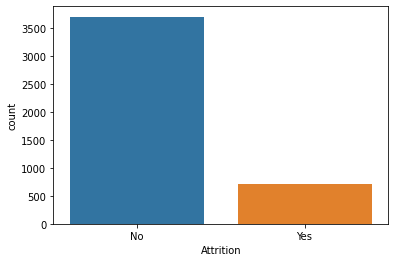

In [18]:
# Plot a countplot representing the distribution of the "attrition" variable
sns.countplot(x='Attrition', data=df);


I will be doing the same algorithms from the Logistical Regression model. 

5 methods:   
0) Control - no change in sampling from original model
1) Random over-sampling with imblearn   
2) Random under-sampling with imblearn     
3) Synthetic Minority Oversampling Technique (SMOTE)  
4) Under-sampling: Tomek links 


_____

## Method 0 - No adaption for imbalance

In [294]:
# # No columns dropped:
X0 = new_df.drop('Attrition_encoded', axis=1).to_numpy()
y0 = new_df['Attrition_encoded'].to_numpy()

# Split the dataset into train, val, and test sets
model0 = split_data(X0, y0)

Check distribution of sets (to check imbalance fix)

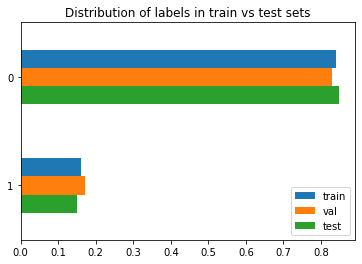

In [280]:
# Plot the distribution of train, validation, and test labels
train_labels0_0 = np.count_nonzero(model0['train'][1] == 0)/len(model0['train'][1])
train_labels0_1 = np.count_nonzero(model0['train'][1] == 1)/len(model0['train'][1])
val_labels0_0 = np.count_nonzero(model0['val'][1] == 0)/len(model0['val'][1])
val_labels0_1 = np.count_nonzero(model0['val'][1] == 1)/len(model0['val'][1])
test_labels0_0 = np.count_nonzero(model0['test'][1] == 0)/len(model0['test'][1])
test_labels0_1 = np.count_nonzero(model0['test'][1] == 1)/len(model0['test'][1])

# Concatenate the number of examples in the train and test labels
label_counts0 = pd.DataFrame({
    'train' : [train_labels0_0, train_labels0_1],
    'val' : [val_labels0_0, val_labels0_1],
    'test' : [test_labels0_0, test_labels0_1]
})

# Plot the number of example in the train and test sets for each label category
label_counts0.plot(kind="barh")
ax = plt.gca()
ax.invert_yaxis()
plt.title("Distribution of labels in train vs test sets")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

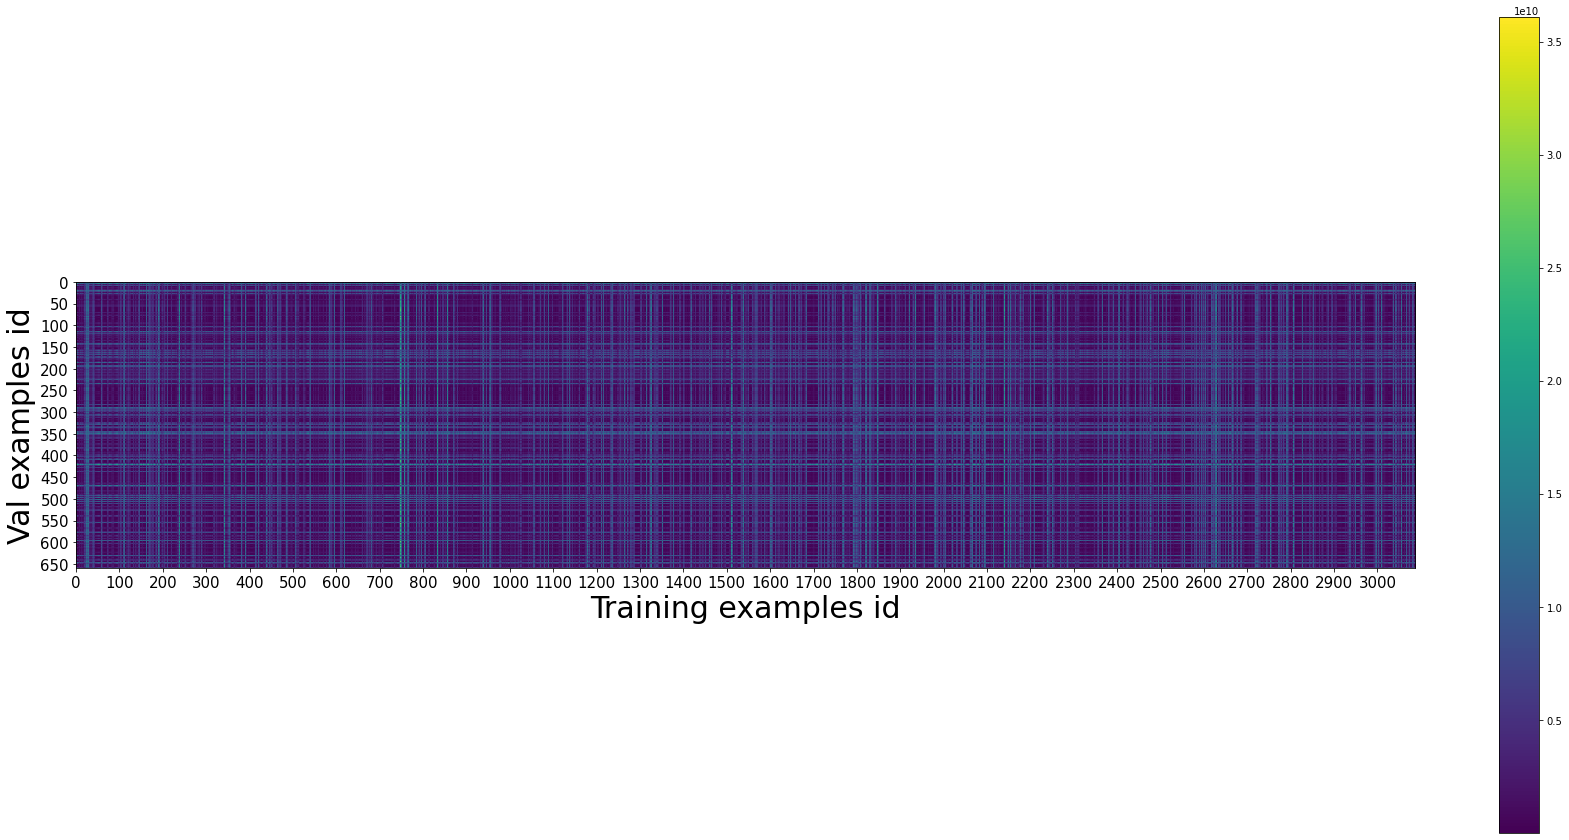

In [453]:
distances = []
for x_val in model0['val'][0]:
    distance = np.sum((x_val[np.newaxis, ...] - model0['train'][0]) ** 2, axis=1)
    distances.append(distance)

distances = np.array(distances)
plt.figure(figsize=(30, 15))
plt.imshow(distances)
plt.colorbar()
plt.xlabel('Training examples id', fontsize=30)
plt.ylabel('Val examples id', fontsize=30)
plt.xticks(np.arange(0, model0['train'][0].shape[0], 100), fontsize=15)
plt.yticks(np.arange(0, model0['val'][0].shape[0], 50), fontsize=15)
plt.show

In [326]:
train_value0 = []
val_accs0 = []

k_max = 31

for k in range(1, k_max):
    # Create K nearest neighbors classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(model0['train'][0], model0['train'][1])
    
    # Prediction
    y_pred = neigh.predict(model0['val'][0])
    y_train_pred = neigh.predict(model0['train'][0])
    
    # Calculate accuracy
    acc = (y_pred == model0['val'][1]).mean()
    val_accs0.append(acc)
    train_value0.append((y_train_pred == model0['train'][1]).mean())

<function matplotlib.pyplot.show(close=None, block=None)>

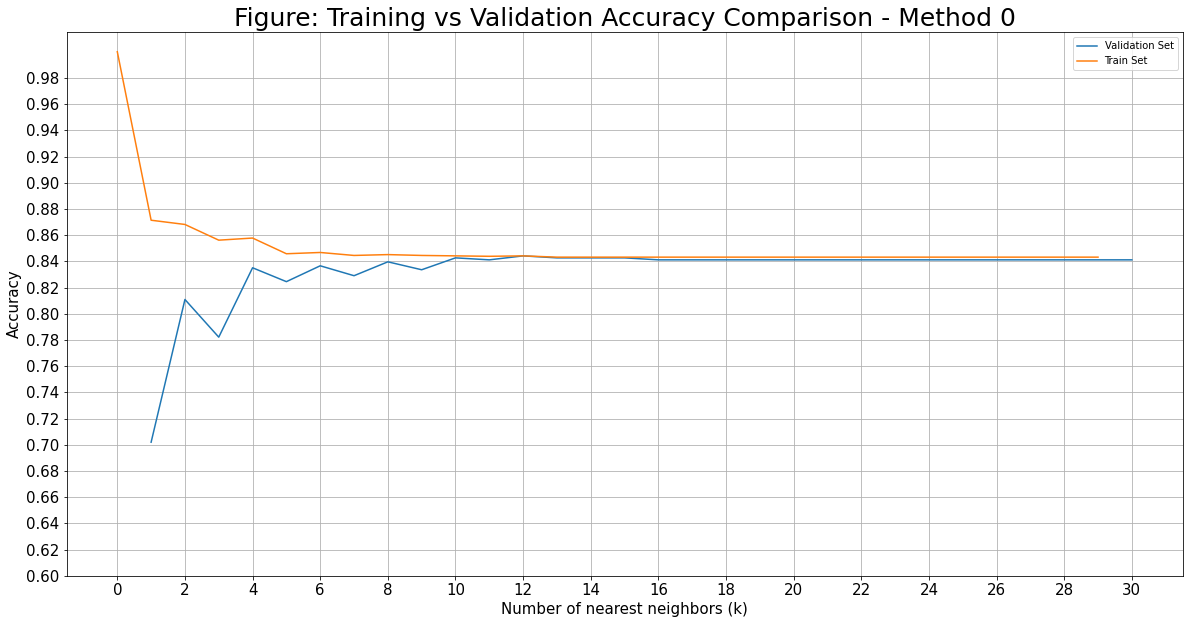

In [327]:
plt.figure(figsize=(20, 10))

plt.plot(list(range(1, k_max)), val_accs0, train_value0)
plt.title('Figure: Training vs Validation Accuracy Comparison - Method 0', fontsize=25)
plt.xlabel('Number of nearest neighbors (k)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(np.arange(0, k_max, 2), fontsize=15)
plt.yticks(np.arange(0.6, 1, 0.02), fontsize=15)
plt.grid()
plt.legend(['Validation Set', 'Train Set'])

# plt.savefig('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/knn_acc_plot/knn_acc_plot_m0.png', bbox_inches='tight', facecolor = 'white')

plt.show

**Based on several iterations of the above graph, the max accuracy for the validation set was between 6-14. I chose k=6 as it appeared the most often and tended to still have a relatively high accuracy, comparatively.** 

In [328]:
k = 6

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(*model0['train'])I 
    
# Prediction
y0_pred_test = neigh.predict(model0['test'][0])
    
# Calculate accuracy
acc0 = (y0_pred_test == model0['test'][1]).mean()
acc0

0.8157099697885196

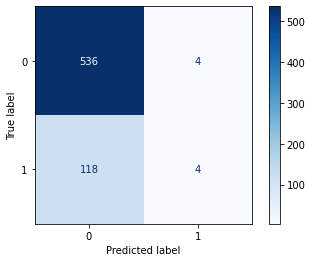

In [329]:
# Generate the Confusion Matrix for this model
cm0 = metrics.confusion_matrix(model0['test'][1], y0_pred_test)
disp0 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm0)
disp0.plot(cmap='Blues')
plt.show()

In [330]:
accuracy0 = pd.DataFrame(metrics.classification_report(model0['test'][1], y0_pred_test, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy0



precision    recall  f1-score    support
No Attrition    0.819572  0.992593  0.897822  540.00000
Yes Attrition   0.500000  0.032787  0.061538  122.00000
accuracy        0.815710  0.815710  0.815710    0.81571
macro avg       0.659786  0.512690  0.479680  662.00000
weighted avg    0.760678  0.815710  0.743704  662.00000

____

## Method 1 - Oversampling (imblearn)

This model looks at fitting the decision tree model on the resampled set using oversampling function from imblearn (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html).

In [331]:
# # No columns dropped:
X1 = new_df.drop('Attrition_encoded', axis=1).to_numpy()
y1 = new_df['Attrition_encoded'].to_numpy()

ros = RandomOverSampler()

# fit predictor and target 
variableX_ros, y_ros = ros.fit_resample(X1, y1)

print('Original dataset shape', y1.shape)
print('Resample dataset shape', y_ros.shape)

# Split the dataset into train, val, and test sets
model1 = split_data(variableX_ros, y_ros)

Original dataset shape (4410,)
Resample dataset shape (7398,)


Check distribution of sets (to check imbalance fix)

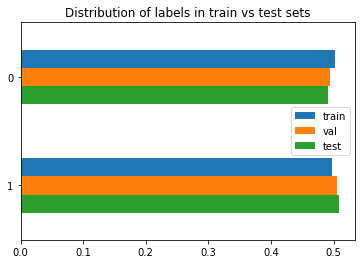

In [332]:
# Plot the distribution of train, validation, and test labels
train_labels1_0 = np.count_nonzero(model1['train'][1] == 0)/len(model1['train'][1])
train_labels1_1 = np.count_nonzero(model1['train'][1] == 1)/len(model1['train'][1])
val_labels1_0 = np.count_nonzero(model1['val'][1] == 0)/len(model1['val'][1])
val_labels1_1 = np.count_nonzero(model1['val'][1] == 1)/len(model1['val'][1])
test_labels1_0 = np.count_nonzero(model1['test'][1] == 0)/len(model1['test'][1])
test_labels1_1 = np.count_nonzero(model1['test'][1] == 1)/len(model1['test'][1])

# Concatenate the number of examples in the train and test labels
label_counts1 = pd.DataFrame({
    'train' : [train_labels1_0, train_labels1_1],
    'val' : [val_labels1_0, val_labels1_1],
    'test' : [test_labels1_0, test_labels1_1]
})

# Plot the number of example in the train and test sets for each label category
label_counts1.plot(kind="barh")
ax = plt.gca()
ax.invert_yaxis()
plt.title("Distribution of labels in train vs test sets")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

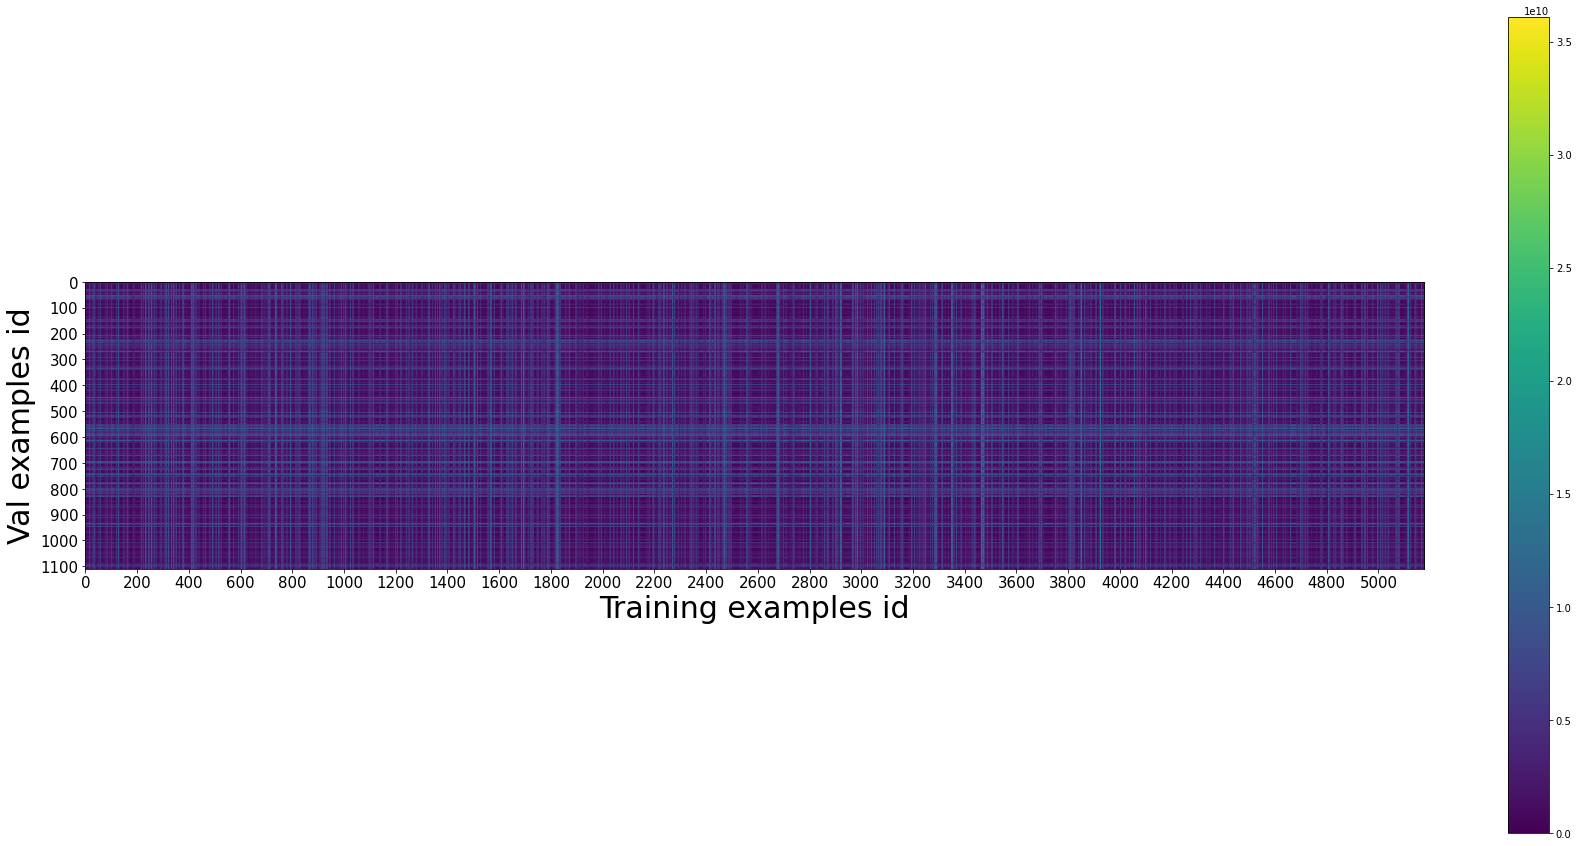

In [389]:
distances1 = []
for x_val in model1['val'][0]:
    distance = np.sum((x_val[np.newaxis, ...] - model1['train'][0]) ** 2, axis=1)
    distances1.append(distance)

distances1 = np.array(distances1)
plt.figure(figsize=(30, 15))
plt.imshow(distances1)
plt.colorbar()
plt.xlabel('Training examples id', fontsize=30)
plt.ylabel('Val examples id', fontsize=30)
plt.xticks(np.arange(0, model1['train'][0].shape[0], 200), fontsize=15)
plt.yticks(np.arange(0, model1['val'][0].shape[0], 100), fontsize=15)
plt.show

In [339]:
train_value1 = []
val_accs1 = []

k_max = 50

for k in range(1, k_max):
    # Create K nearest neighbors classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(model1['train'][0], model1['train'][1])
    
    # Prediction
    y_pred = neigh.predict(model1['val'][0])
    y_train_pred = neigh.predict(model1['train'][0])
    
    # Calculate accuracy
    acc = (y_pred == model1['val'][1]).mean()
    val_accs1.append(acc)
    train_value1.append((y_train_pred == model1['train'][1]).mean())

<function matplotlib.pyplot.show(close=None, block=None)>

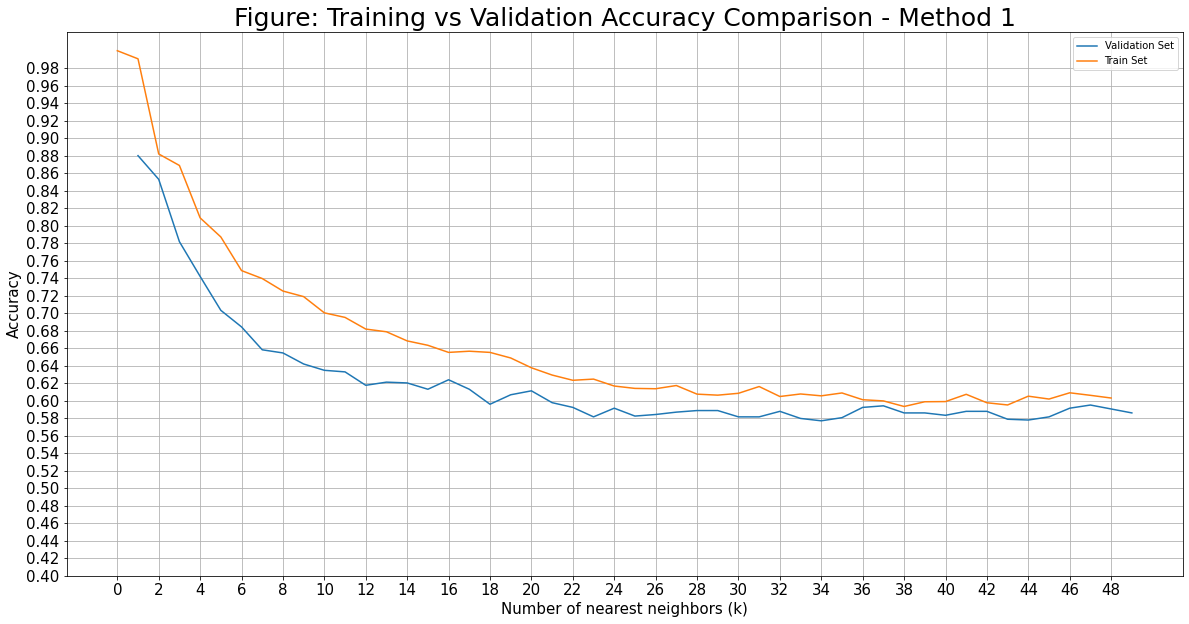

In [344]:
plt.figure(figsize=(20, 10))

plt.plot(list(range(1, k_max)), val_accs1, train_value1)
plt.title('Figure: Training vs Validation Accuracy Comparison - Method 1', fontsize=25)
plt.xlabel('Number of nearest neighbors (k)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(np.arange(0, k_max, 2), fontsize=15)
plt.yticks(np.arange(0.4, 1, 0.02), fontsize=15)
plt.grid()
plt.legend(['Validation Set', 'Train Set'])
# plt.savefig('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/knn_acc_plot/knn_acc_plot_m1.png', bbox_inches='tight', facecolor = 'white')
plt.show

**Based on several iterations of the above graph, the max accuracy occured at k=1. This makes sense with an oversampling model because there is probably a higher saturation of like points closer than previously (as the minority group will be sampling with replacement).** 

In [345]:
k = 1

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(*model1['train'])
    
# Prediction
y1_pred_test = neigh.predict(model1['test'][0])
    
# Calculate accuracy
acc1 = (y1_pred_test == model1['test'][1]).mean()
acc1

0.8838883888388839

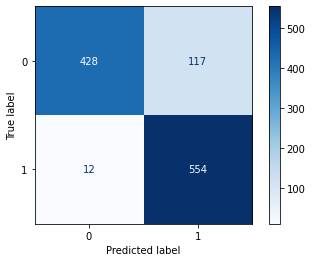

In [346]:
# Generate the Confusion Matrix for this model
cm1 = metrics.confusion_matrix(model1['test'][1], y1_pred_test)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap='Blues')
plt.show()

In [347]:
accuracy1 = pd.DataFrame(metrics.classification_report(model1['test'][1], y1_pred_test, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy1



precision    recall  f1-score      support
No Attrition    0.972727  0.785321  0.869036   545.000000
Yes Attrition   0.825633  0.978799  0.895715   566.000000
accuracy        0.883888  0.883888  0.883888     0.883888
macro avg       0.899180  0.882060  0.882375  1111.000000
weighted avg    0.897790  0.883888  0.882628  1111.000000

_________

## Method 2 - Undersampling (imblearn)

This model looks at fitting the regression model on the resampled set using undersampling function from imblearn (https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html).

In [375]:
X2 = new_df.drop('Attrition_encoded', axis=1).to_numpy()
y2 = new_df['Attrition_encoded'].to_numpy()

rus = RandomUnderSampler()

# fit predictor and target 
variableX_rus, y_rus = rus.fit_resample(X2, y2)

print('Original dataset shape', y2.shape)
print('Resample dataset shape', y_rus.shape)

# Split the dataset into train, val, and test sets
model2 = split_data(variableX_rus, y_rus)

Original dataset shape (4410,)
Resample dataset shape (1422,)


Check distribution of sets (to check imbalance fix)

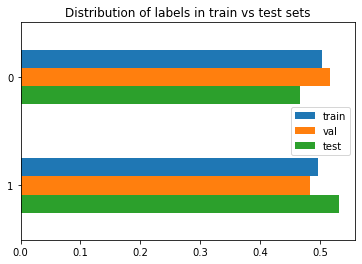

In [351]:
# Plot the distribution of train, validation, and test labels
train_labels2_0 = np.count_nonzero(model2['train'][1] == 0)/len(model2['train'][1])
train_labels2_1 = np.count_nonzero(model2['train'][1] == 1)/len(model2['train'][1])
val_labels2_0 = np.count_nonzero(model2['val'][1] == 0)/len(model2['val'][1])
val_labels2_1 = np.count_nonzero(model2['val'][1] == 1)/len(model2['val'][1])
test_labels2_0 = np.count_nonzero(model2['test'][1] == 0)/len(model2['test'][1])
test_labels2_1 = np.count_nonzero(model2['test'][1] == 1)/len(model2['test'][1])

# Concatenate the number of examples in the train and test labels
label_counts2 = pd.DataFrame({
    'train' : [train_labels2_0, train_labels2_1],
    'val' : [val_labels2_0, val_labels2_1],
    'test' : [test_labels2_0, test_labels2_1]
})

# Plot the number of example in the train and test sets for each label category
label_counts2.plot(kind="barh")
ax = plt.gca()
ax.invert_yaxis()
plt.title("Distribution of labels in train vs test sets")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

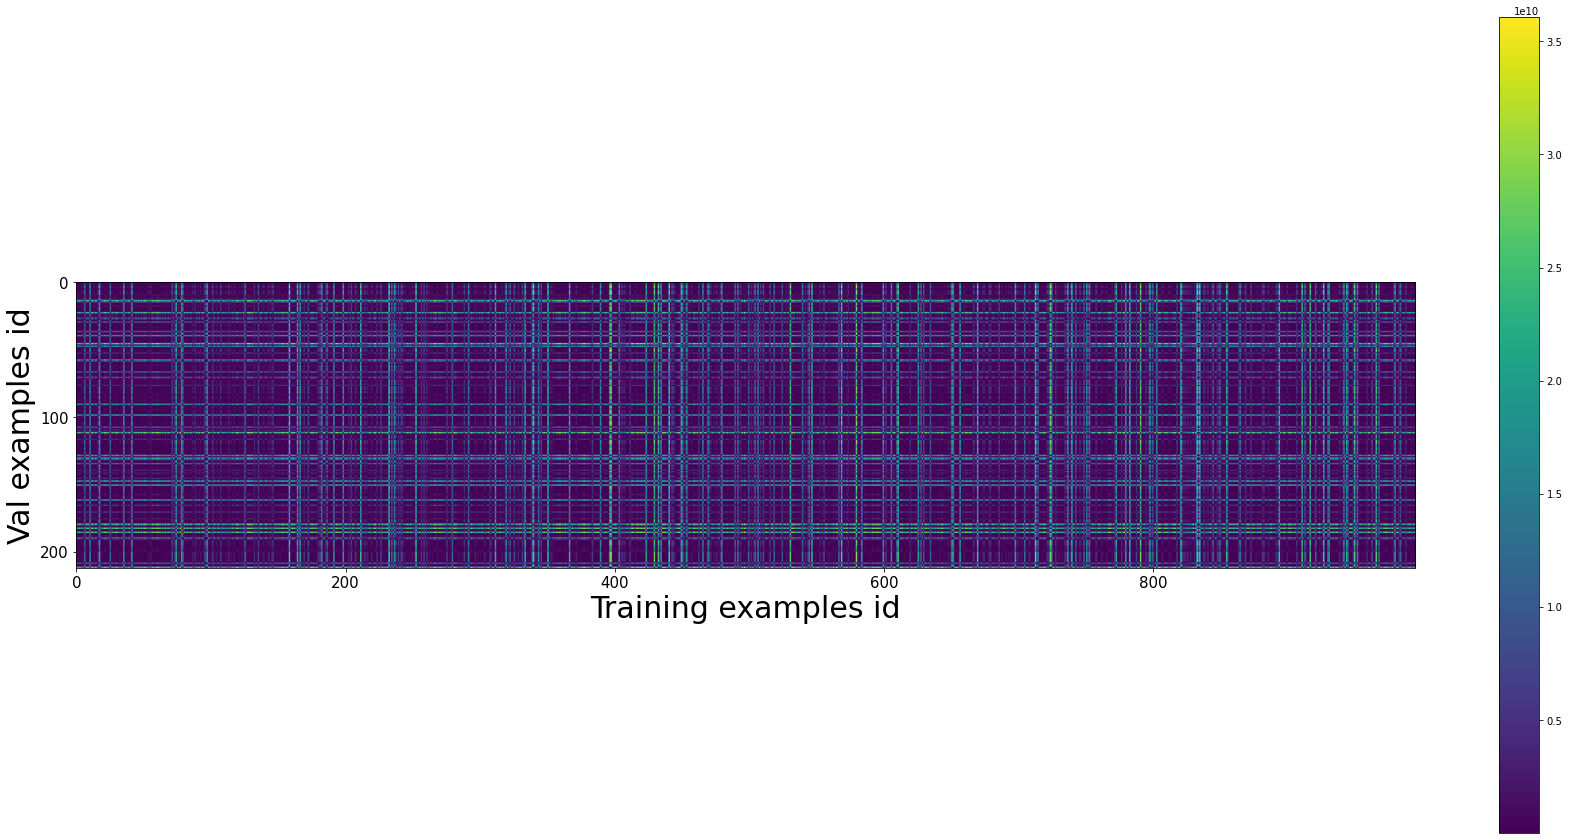

In [388]:
distances2 = []
for x_val in model2['val'][0]:
    distance = np.sum((x_val[np.newaxis, ...] - model2['train'][0]) ** 2, axis=1)
    distances2.append(distance)

distances2 = np.array(distances2)
plt.figure(figsize=(30, 15))
plt.imshow(distances2)
plt.colorbar()
plt.xlabel('Training examples id', fontsize=30)
plt.ylabel('Val examples id', fontsize=30)
plt.xticks(np.arange(0, model2['train'][0].shape[0], 200), fontsize=15)
plt.yticks(np.arange(0, model2['val'][0].shape[0], 100), fontsize=15)
plt.show

The above figure shows that the distribution of training examples is not that great because there is a far distance for some of them. Overall, you want the most closest k-neighbours (dark blue in this case).

In [376]:
train_value2 = []
val_accs2 = []

k_max = 200

for k in range(1, k_max):
    # Create K nearest neighbors classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(model2['train'][0], model2['train'][1])
    
    # Prediction
    y_pred = neigh.predict(model2['val'][0])
    y_train_pred = neigh.predict(model2['train'][0])
    
    # Calculate accuracy
    acc = (y_pred == model2['val'][1]).mean()
    val_accs2.append(acc)
    train_value2.append((y_train_pred == model2['train'][1]).mean())

<function matplotlib.pyplot.show(close=None, block=None)>

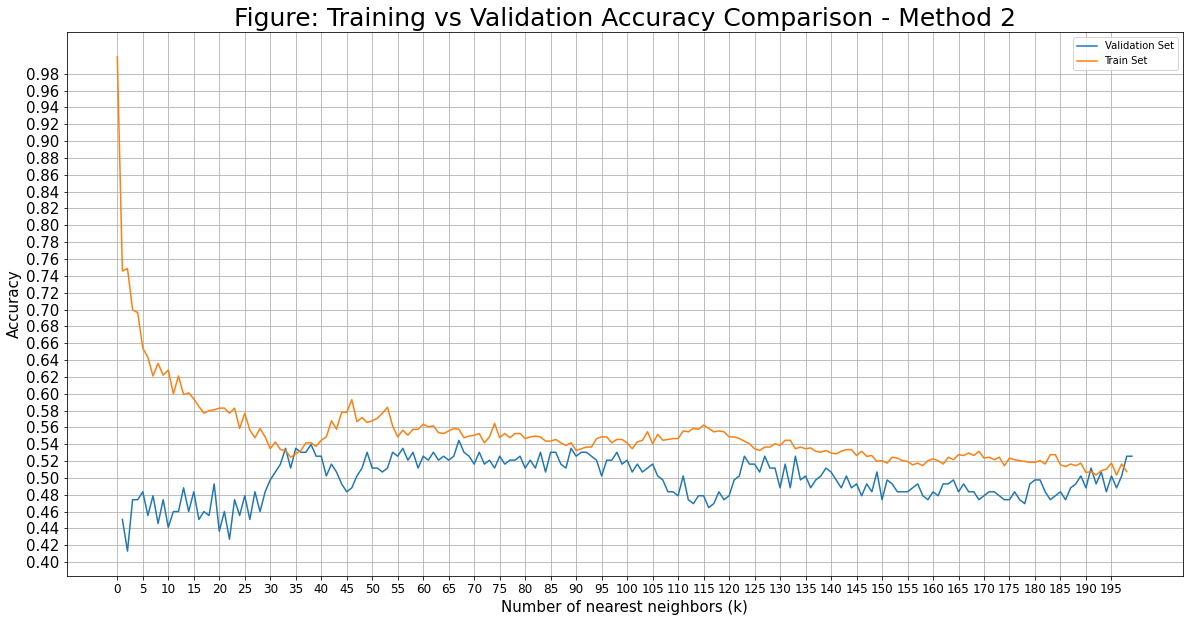

In [378]:
plt.figure(figsize=(20, 10))

plt.plot(list(range(1, k_max)), val_accs2, train_value2)
plt.title('Figure: Training vs Validation Accuracy Comparison - Method 2', fontsize=25)
plt.xlabel('Number of nearest neighbors (k)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(np.arange(0, k_max, 5), fontsize=12)
plt.yticks(np.arange(0.4, 1, 0.02), fontsize=15)
plt.grid()
plt.legend(['Validation Set', 'Train Set'])
# plt.savefig('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/knn_acc_plot/knn_acc_plot_m2.png', bbox_inches='tight', facecolor = 'white')
plt.show

**Based on several iterations of the above graph, it can be seen that the acccuracy does not seem to converge. After several iterations, I noticed that on average the k-value that resulted in a higher accuracy was usually between: 20-50. The most often it hovered at a high peak around 45, so I have chosen k=45. I am also not expecting that great of a model due to the lack of convergence.** 

In [390]:
k = 45

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(*model2['train'])
    
# Prediction
y2_pred_test = neigh.predict(model2['test'][0])
    
# Calculate accuracy
acc2 = (y2_pred_test == model2['test'][1]).mean()
acc2

0.514018691588785

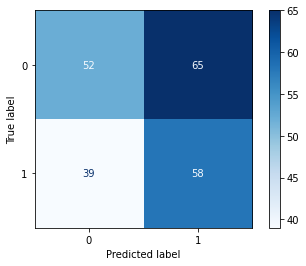

In [391]:
# Generate the Confusion Matrix for this model
cm2 = metrics.confusion_matrix(model2['test'][1], y2_pred_test)
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap='Blues')
plt.show()

In [392]:
accuracy2 = pd.DataFrame(metrics.classification_report(model2['test'][1], y2_pred_test, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy2



precision    recall  f1-score     support
No Attrition    0.571429  0.444444  0.500000  117.000000
Yes Attrition   0.471545  0.597938  0.527273   97.000000
accuracy        0.514019  0.514019  0.514019    0.514019
macro avg       0.521487  0.521191  0.513636  214.000000
weighted avg    0.526154  0.514019  0.512362  214.000000

___

## Method 3 - SMOTE

This model looks at fitting the regression model on the resampled set using SMOTE from imblearn (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

SMOTE (Synthetic Minority Oversampling Technique): works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors to increase the number of minority points in the dataset.

In [393]:
X3 = new_df.drop('Attrition_encoded', axis=1).to_numpy()
y3 = new_df['Attrition_encoded'].to_numpy()

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X3, y3)

print('Original dataset shape', y3.shape)
print('Resample dataset shape', y_smote.shape)

# Split the dataset into train, val, and test sets
model3 = split_data(x_smote, y_smote)

Original dataset shape (4410,)
Resample dataset shape (7398,)


Check distribution of sets (to check imbalance fix)

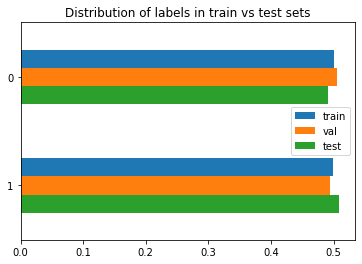

In [394]:
# Plot the distribution of train, validation, and test labels
train_labels3_0 = np.count_nonzero(model3['train'][1] == 0)/len(model3['train'][1])
train_labels3_1 = np.count_nonzero(model3['train'][1] == 1)/len(model3['train'][1])
val_labels3_0 = np.count_nonzero(model3['val'][1] == 0)/len(model3['val'][1])
val_labels3_1 = np.count_nonzero(model3['val'][1] == 1)/len(model3['val'][1])
test_labels3_0 = np.count_nonzero(model3['test'][1] == 0)/len(model3['test'][1])
test_labels3_1 = np.count_nonzero(model3['test'][1] == 1)/len(model3['test'][1])

# Concatenate the number of examples in the train and test labels
label_counts3 = pd.DataFrame({
    'train' : [train_labels3_0, train_labels3_1],
    'val' : [val_labels3_0, val_labels3_1],
    'test' : [test_labels3_0, test_labels3_1]
})

# Plot the number of example in the train and test sets for each label category
label_counts3.plot(kind="barh")
ax = plt.gca()
ax.invert_yaxis()
plt.title("Distribution of labels in train vs test sets")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

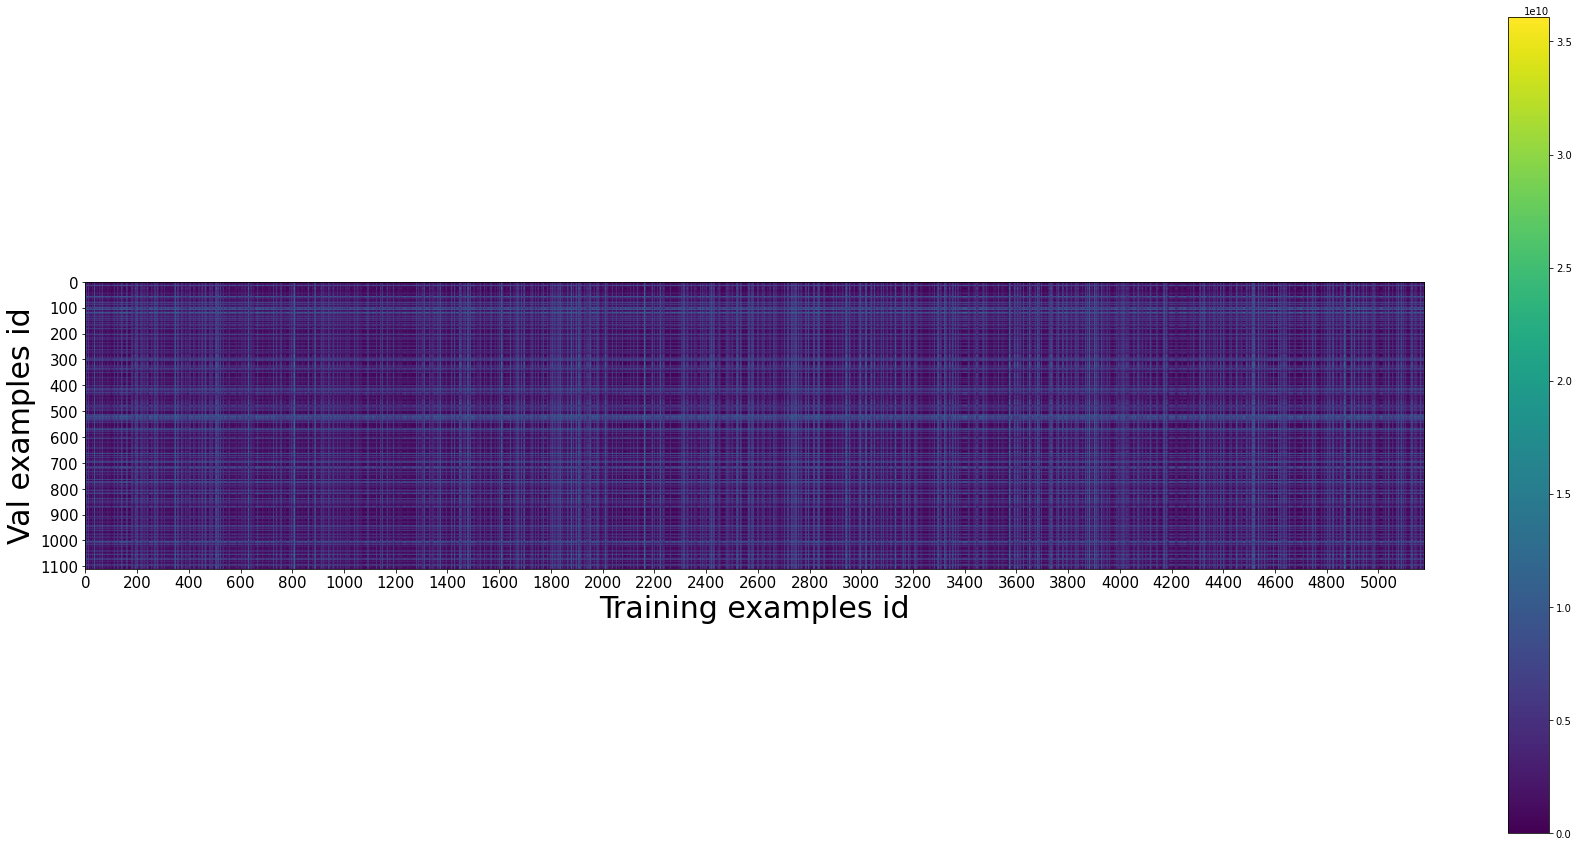

In [395]:
distances3 = []
for x_val in model3['val'][0]:
    distance = np.sum((x_val[np.newaxis, ...] - model3['train'][0]) ** 2, axis=1)
    distances3.append(distance)

distances3 = np.array(distances3)
plt.figure(figsize=(30, 15))
plt.imshow(distances3)
plt.colorbar()
plt.xlabel('Training examples id', fontsize=30)
plt.ylabel('Val examples id', fontsize=30)
plt.xticks(np.arange(0, model3['train'][0].shape[0], 200), fontsize=15)
plt.yticks(np.arange(0, model3['val'][0].shape[0], 100), fontsize=15)
plt.show

In [407]:
train_value3 = []
val_accs3 = []

k_max = 50

for k in range(1, k_max):
    # Create K nearest neighbors classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(model3['train'][0], model3['train'][1])
    
    # Prediction
    y_pred = neigh.predict(model3['val'][0])
    y_train_pred = neigh.predict(model3['train'][0])
    
    # Calculate accuracy
    acc = (y_pred == model3['val'][1]).mean()
    val_accs3.append(acc)
    train_value3.append((y_train_pred == model3['train'][1]).mean())

<function matplotlib.pyplot.show(close=None, block=None)>

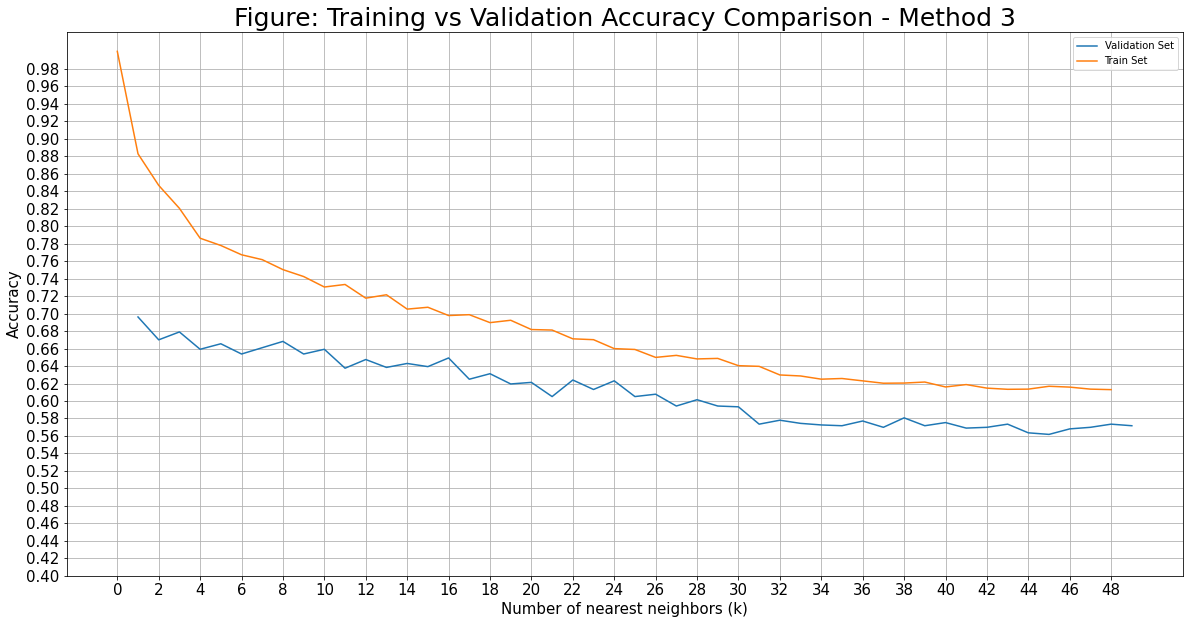

In [408]:
plt.figure(figsize=(20, 10))

plt.plot(list(range(1, k_max)), val_accs3, train_value3)
plt.title('Figure: Training vs Validation Accuracy Comparison - Method 3', fontsize=25)
plt.xlabel('Number of nearest neighbors (k)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(np.arange(0, k_max, 2), fontsize=15)
plt.yticks(np.arange(0.4, 1, 0.02), fontsize=15)
plt.grid()
plt.legend(['Validation Set', 'Train Set'])
# plt.savefig('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/knn_acc_plot/knn_acc_plot_m3.png', bbox_inches='tight', facecolor = 'white')
plt.show

**Based on several iterations of the above graph, the max accuracy occured at k=1. This makes sense with an oversampling model because there is probably a higher saturation of like points closer than previously (as the minority group will be sampling with replacement).** 

In [398]:
k = 1

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(*model3['train'])
    
# Prediction
y3_pred_test = neigh.predict(model3['test'][0])
    
# Calculate accuracy
acc3 = (y3_pred_test == model3['test'][1]).mean()
acc3

0.7137713771377138

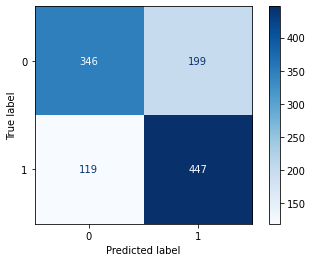

In [399]:
# Generate the Confusion Matrix for this model
cm3 = metrics.confusion_matrix(model3['test'][1], y3_pred_test)
disp3 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot(cmap='Blues')
plt.show()

In [400]:
accuracy3 = pd.DataFrame(metrics.classification_report(model3['test'][1], y3_pred_test, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy3


precision    recall  f1-score      support
No Attrition    0.744086  0.634862  0.685149   545.000000
Yes Attrition   0.691950  0.789753  0.737624   566.000000
accuracy        0.713771  0.713771  0.713771     0.713771
macro avg       0.718018  0.712308  0.711386  1111.000000
weighted avg    0.717526  0.713771  0.711882  1111.000000

_____

## Model 4 - Tomek Links

This model looks at fitting the regression model on the resampled set using Tomek Links from imblearn (https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)

Tomek Links: pairs minority with majority nearest neighbours and then deletes the majority nearest neighbour. This gives more distance between the two groups, making it easier to classify the minority.

In [439]:
X4 = new_df.drop('Attrition_encoded', axis=1).to_numpy()
y4 = new_df['Attrition_encoded'].to_numpy()

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(X4, y4)

print('Original dataset shape', y4.shape)
print('Resample dataset shape', y_tl.shape)

# Split the dataset into train, val, and test sets
model4 = split_data(variableX_rus, y_rus)

Original dataset shape (4410,)
Resample dataset shape (4037,)


Check distribution of sets (to check imbalance fix)

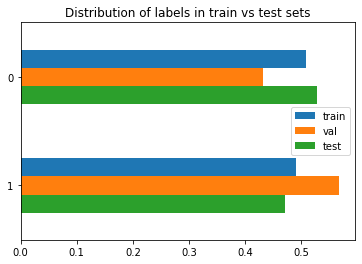

In [402]:
# Plot the distribution of train, validation, and test labels
train_labels4_0 = np.count_nonzero(model4['train'][1] == 0)/len(model4['train'][1])
train_labels4_1 = np.count_nonzero(model4['train'][1] == 1)/len(model4['train'][1])
val_labels4_0 = np.count_nonzero(model4['val'][1] == 0)/len(model4['val'][1])
val_labels4_1 = np.count_nonzero(model4['val'][1] == 1)/len(model4['val'][1])
test_labels4_0 = np.count_nonzero(model4['test'][1] == 0)/len(model4['test'][1])
test_labels4_1 = np.count_nonzero(model4['test'][1] == 1)/len(model4['test'][1])

# Concatenate the number of examples in the train and test labels
label_counts4 = pd.DataFrame({
    'train' : [train_labels4_0, train_labels4_1],
    'val' : [val_labels4_0, val_labels4_1],
    'test' : [test_labels4_0, test_labels4_1]
})

# Plot the number of example in the train and test sets for each label category
label_counts4.plot(kind="barh")
ax = plt.gca()
ax.invert_yaxis()
plt.title("Distribution of labels in train vs test sets")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

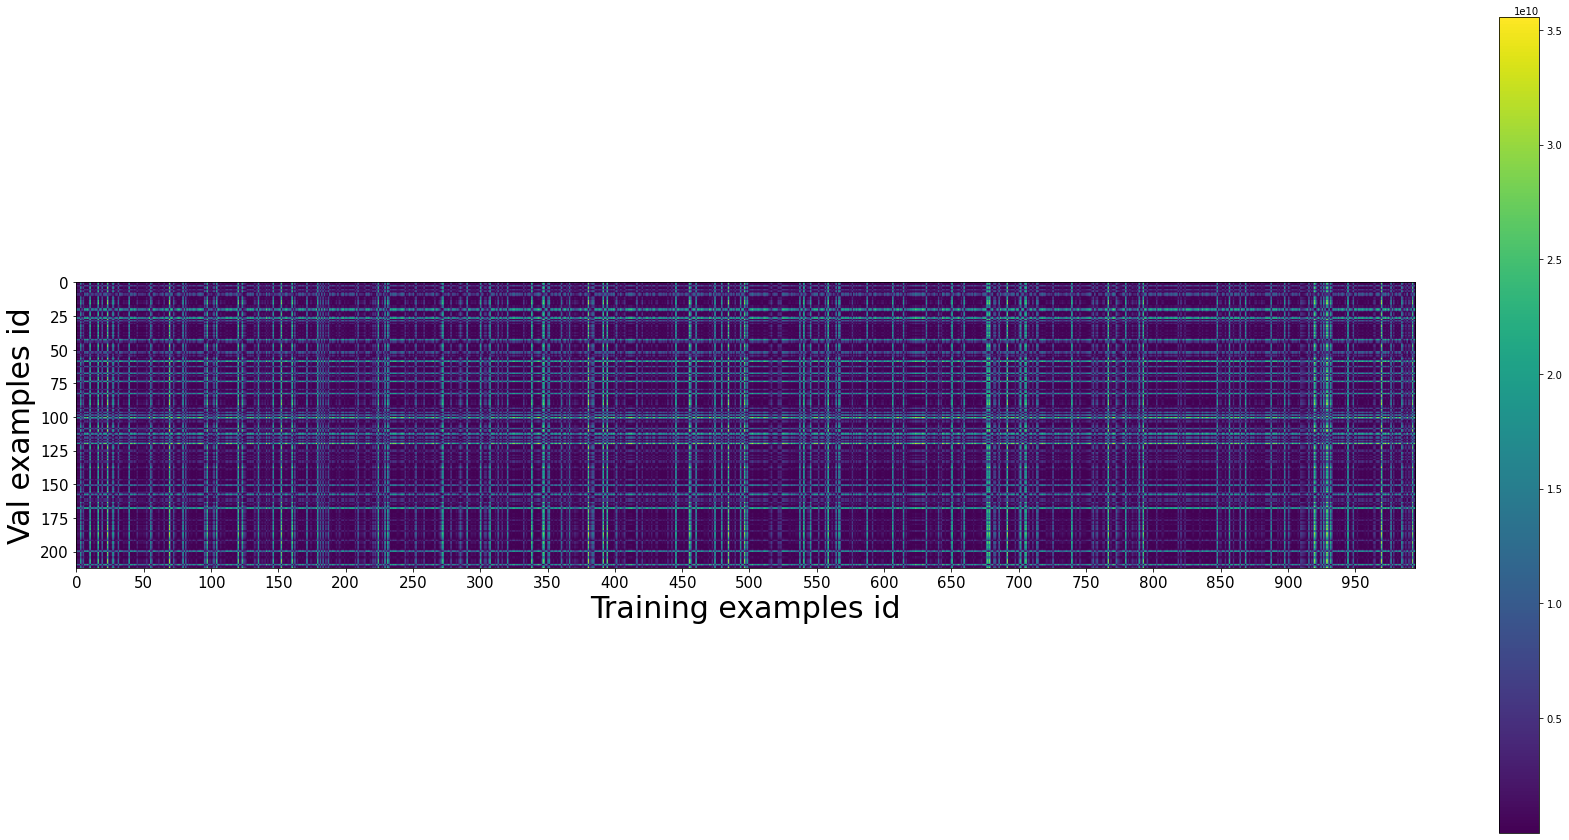

In [403]:
distances4 = []
for x_val in model4['val'][0]:
    distance = np.sum((x_val[np.newaxis, ...] - model4['train'][0]) ** 2, axis=1)
    distances4.append(distance)

distances4 = np.array(distances4)
plt.figure(figsize=(30, 15))
plt.imshow(distances4)
plt.colorbar()
plt.xlabel('Training examples id', fontsize=30)
plt.ylabel('Val examples id', fontsize=30)
plt.xticks(np.arange(0, model4['train'][0].shape[0], 50), fontsize=15)
plt.yticks(np.arange(0, model4['val'][0].shape[0], 25), fontsize=15)
plt.show

The above figure shows that the distribution of training examples is not that great because there is a far distance for some of them. Overall, you want the most closest k-neighbours (dark blue in this case).

In [440]:
train_value4 = []
val_accs4 = []

k_max = 100

for k in range(1, k_max):
    # Create K nearest neighbors classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(model4['train'][0], model4['train'][1])
    
    # Prediction
    y_pred = neigh.predict(model4['val'][0])
    y_train_pred = neigh.predict(model4['train'][0])
    
    # Calculate accuracy
    acc = (y_pred == model4['val'][1]).mean()
    val_accs4.append(acc)
    train_value4.append((y_train_pred == model4['train'][1]).mean())

<function matplotlib.pyplot.show(close=None, block=None)>

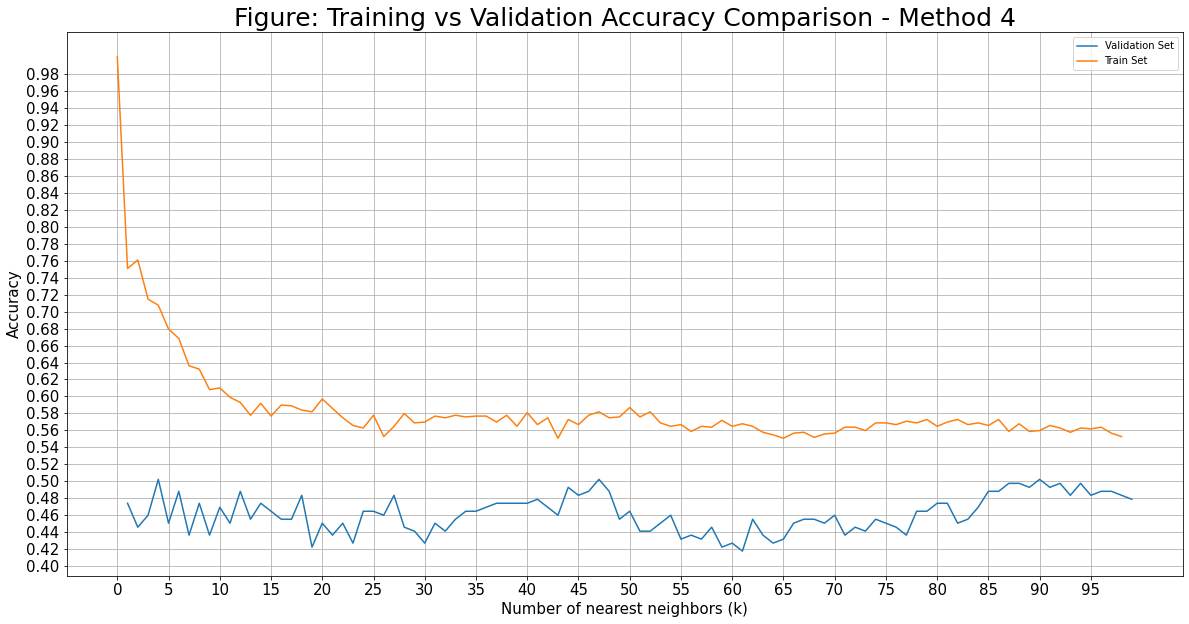

In [442]:
plt.figure(figsize=(20, 10))

plt.plot(list(range(1, k_max)), val_accs4, train_value4)
plt.title('Figure: Training vs Validation Accuracy Comparison - Method 4', fontsize=25)
plt.xlabel('Number of nearest neighbors (k)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(np.arange(0, k_max, 5), fontsize=15)
plt.yticks(np.arange(0.4, 1, 0.02), fontsize=15)
plt.grid()
plt.legend(['Validation Set', 'Train Set'])
# plt.savefig('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/knn_acc_plot/knn_acc_plot_m4.png', bbox_inches='tight', facecolor = 'white')
plt.show

**Based on several iterations of the above graph, it can be seen that the acccuracy does not seem to converge. After several iterations, I noticed that on average the k-value that resulted in a higher accuracy was usually between: 35-55. It is usually closer to 50, so I have chosen k=50. I am also not expecting that great of a model due to the lack of convergence.**

In [444]:
k = 50

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(*model4['train'])
    
# Prediction
y4_pred_test = neigh.predict(model4['test'][0])
    
# Calculate accuracy
acc4 = (y4_pred_test == model4['test'][1]).mean()
acc4

0.5420560747663551

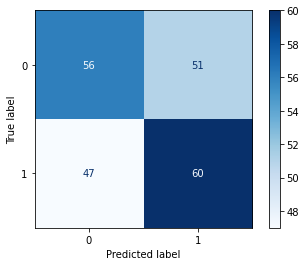

In [445]:
# Generate the Confusion Matrix for this model
cm4 = metrics.confusion_matrix(model4['test'][1], y4_pred_test)
disp4 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm4)
disp4.plot(cmap='Blues')
plt.show()

In [446]:
accuracy4 = pd.DataFrame(metrics.classification_report(model4['test'][1], y4_pred_test, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy4


precision    recall  f1-score     support
No Attrition    0.543689  0.523364  0.533333  107.000000
Yes Attrition   0.540541  0.560748  0.550459  107.000000
accuracy        0.542056  0.542056  0.542056    0.542056
macro avg       0.542115  0.542056  0.541896  214.000000
weighted avg    0.542115  0.542056  0.541896  214.000000

___

## Conclusion:

In [450]:
combined_conclusion_df = pd.DataFrame({
    'Method0' : [accuracy0['precision']['No Attrition'], accuracy0['precision']['Yes Attrition'], accuracy0['recall']['No Attrition'], accuracy0['recall']['Yes Attrition'], accuracy0['f1-score']['No Attrition'], accuracy0['f1-score']['Yes Attrition'], accuracy0['f1-score']['accuracy']],
    'Method1' : [accuracy1['precision']['No Attrition'], accuracy1['precision']['Yes Attrition'], accuracy1['recall']['No Attrition'], accuracy1['recall']['Yes Attrition'], accuracy1['f1-score']['No Attrition'], accuracy1['f1-score']['Yes Attrition'], accuracy1['f1-score']['accuracy']],
    'Method2' : [accuracy2['precision']['No Attrition'], accuracy2['precision']['Yes Attrition'], accuracy2['recall']['No Attrition'], accuracy2['recall']['Yes Attrition'], accuracy2['f1-score']['No Attrition'], accuracy2['f1-score']['Yes Attrition'], accuracy2['f1-score']['accuracy']],
    'Method3' : [accuracy3['precision']['No Attrition'], accuracy3['precision']['Yes Attrition'], accuracy3['recall']['No Attrition'], accuracy3['recall']['Yes Attrition'], accuracy3['f1-score']['No Attrition'], accuracy3['f1-score']['Yes Attrition'], accuracy3['f1-score']['accuracy']],
    'Method4' : [accuracy4['precision']['No Attrition'], accuracy4['precision']['Yes Attrition'], accuracy4['recall']['No Attrition'], accuracy4['recall']['Yes Attrition'], accuracy4['f1-score']['No Attrition'], accuracy4['f1-score']['Yes Attrition'], accuracy4['f1-score']['accuracy']],
    
})

combined_conclusion_df = combined_conclusion_df.set_axis(['no_precision', 'yes_precision',
                                 'no_recall', 'yes_recall',
                                 'no_f1', 'yes_f1',
                                 'accuracy'
                                ], axis=0)

# Save to png
# dfi.export(combined_conclusion_df, '/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/knn_comparison.png')

combined_conclusion_df

Method0   Method1   Method2   Method3   Method4
no_precision   0.819572  0.972727  0.571429  0.744086  0.543689
yes_precision  0.500000  0.825633  0.471545  0.691950  0.540541
no_recall      0.992593  0.785321  0.444444  0.634862  0.523364
yes_recall     0.032787  0.978799  0.597938  0.789753  0.560748
no_f1          0.897822  0.869036  0.500000  0.685149  0.533333
yes_f1         0.061538  0.895715  0.527273  0.737624  0.550459
accuracy       0.815710  0.883888  0.514019  0.713771  0.542056

---

## Which method did best?

On average, the k-NN did worse than the decision tree and only slightly better than logistic regression, with the exception of method 1. That method performed significantly better than the logistic regression.

### Method 1 (Oversampling with imblearn)

As can be seen, the random oversampling performed the best on all metrics when compared to the other methods